<a href="https://colab.research.google.com/github/Koustav-Mandal/PRODIGY_ML_03/blob/main/ProdigyInfoTech3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir-p ~/.kaggle
!cp kaggle.json ~/.kaggle/

/bin/bash: line 1: mkdir-p: command not found
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:29<00:00, 31.6MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten


In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image= tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 1.3925 - val_accuracy: 0.7720
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0268 - accuracy: 0.9924 - val_loss: 1.3763 - val_accuracy: 0.7776
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 1.2597 - val_accuracy: 0.7878
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.0257 - accuracy: 0.9912 - val_loss: 1.6235 - val_accuracy: 0.7780
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0201 - accuracy: 0.9930 - val_loss: 1.6021 - val_accuracy: 0.7870
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 1.9825 - val_accuracy: 0.7542
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0220 - accuracy: 0.9939 - val_loss: 1.4724 - val_accuracy

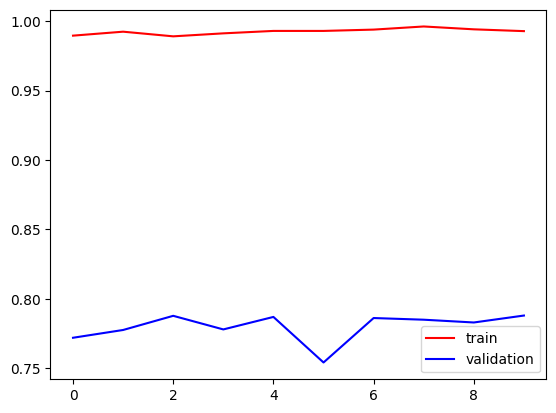

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()


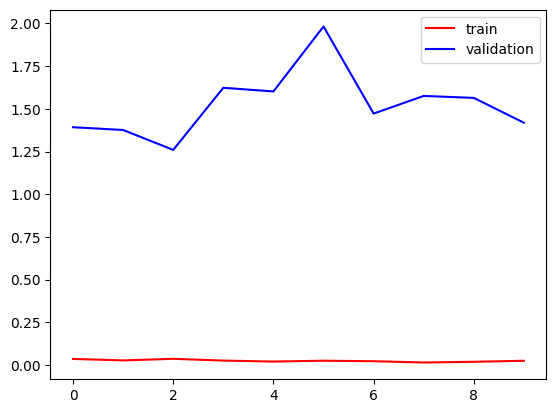

In [ ]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()